In [1]:
from pathlib import Path

import pandas as pd
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import LeaveOneGroupOut

from utilsPlots import *


In [2]:
datadir = Path('../datadir')

figdir = Path('./figs')
figdir.mkdir(exist_ok=True, parents=True)


In [3]:
df_info = pd.read_csv(datadir / 'participant_info.csv')
df_feat = pd.read_csv(datadir / 'video_features.csv')
df_all = df_info.merge(df_feat, on=['ID', 'day'])


In [4]:
def loso_linreg(df, feats, label):
    model = LinearRegression()
        
    X = df[feats].values
    y = df[label].values
    groups = df.ID.values
    
    preds = cross_val_predict(model, X=X, y=y, cv=LeaveOneGroupOut(),
                              groups=groups, n_jobs=-1)
    df_res = df.copy()
    df_res['pred'] = preds 
    
    return df_res


In [5]:
import matplotlib.ticker as mticker

def scatter_hue(df, x, y, logscale=False):
    sns.scatterplot(data=df, x=x, y=y, hue='type',
                    hue_order=['FSHD', 'DM', 'TYP'],
                    palette=[cp[3], cp[0], cp[1]], lw=0, s=20)
    xmin = ymin = df[[x, y]].min()
    xmax = ymax = df[[x, y]].max()
    plt.plot([xmin, xmax], [ymin, ymax], lw=1, c='#808080', zorder=-2)
    if logscale:
        plt.semilogx()
        plt.semilogy()
        plt.gca().xaxis.set_major_formatter(mticker.ScalarFormatter())
        plt.gca().xaxis.get_major_formatter().set_scientific(False)
        plt.gca().xaxis.get_major_formatter().set_useOffset(False)
        plt.gca().xaxis.set_minor_formatter(mticker.ScalarFormatter())
        plt.gca().xaxis.get_minor_formatter().set_scientific(False)
        plt.gca().xaxis.get_minor_formatter().set_useOffset(False)
        plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter())
        plt.gca().yaxis.get_major_formatter().set_scientific(False)
        plt.gca().yaxis.get_major_formatter().set_useOffset(False)
        plt.gca().yaxis.set_minor_formatter(mticker.ScalarFormatter())
        plt.gca().yaxis.get_minor_formatter().set_scientific(False)
        plt.gca().yaxis.get_minor_formatter().set_useOffset(False)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(loc='lower right', frameon=False,
               labelspacing=0.5, handletextpad=0)
    plt.axis('equal')


10mwrt_time_10m Pearson correlation: 0.9913786644124959
10mwt_time_10m Pearson correlation: 0.9846180898578166
tug_cone_time Pearson correlation: 0.9912642272881728
5xsts_time_5 Pearson correlation: 0.9934824783791001
5xsts_time_5 MAE: 0.34881523427073646



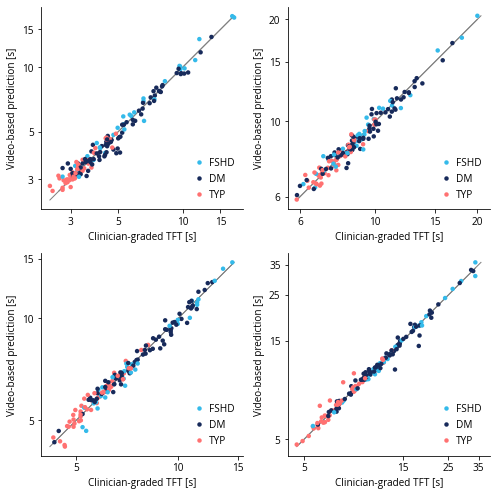

In [6]:
plt.figure(figsize=(7,7))

plt.subplot(2,2,1)
feat = '10mwrt_time_10m'
label = 'tft_10mwrt'
df_all['10mwrt_time_10m'] = 10 / df_all['10mwrt_speed']
df = df_all.dropna(subset=[feat, label])
df_res = loso_linreg(df, [feat], label)
scatter_hue(df_res, label, 'pred', logscale=True)
plt.xlabel("Clinician-graded TFT [s]")
plt.ylabel("Video-based prediction [s]")
plt.axis('square')
ticks = [3, 5, 10, 15]
plt.xticks(ticks)
plt.xticks([], minor=True)
plt.yticks(ticks)
plt.yticks([], minor=True)
print(feat, 'Pearson correlation:', pearsonr(df_res[label], df_res['pred']).statistic)

plt.subplot(2,2,2)
feat = '10mwt_time_10m'
label = 'tft_10mwt'
df_all['10mwt_time_10m'] = 10 / df_all['10mwt_speed']
df = df_all.dropna(subset=[feat, label])
df_res = loso_linreg(df, [feat], label)
scatter_hue(df_res, label, 'pred', logscale=True)
plt.xlabel("Clinician-graded TFT [s]")
plt.ylabel("Video-based prediction [s]")
plt.axis('square')
ticks = [6, 10, 15, 20]
plt.xticks(ticks)
plt.xticks([], minor=True)
plt.yticks(ticks)
plt.yticks([], minor=True)
print(feat, 'Pearson correlation:', pearsonr(df_res[label], df_res['pred']).statistic)

plt.subplot(2,2,3)
feat = 'tug_cone_time'
label = 'tft_tug'
df = df_all.dropna(subset=[feat, label])
df_res = loso_linreg(df, [feat], label)
scatter_hue(df_res, label, 'pred', logscale=True)
plt.xlabel("Clinician-graded TFT [s]")
plt.ylabel("Video-based prediction [s]")
plt.axis('square')
ticks = [5, 10, 15]
plt.xticks(ticks)
plt.xticks([], minor=True)
plt.yticks(ticks)
plt.yticks([], minor=True)
print(feat, 'Pearson correlation:', pearsonr(df_res[label], df_res['pred']).statistic)

plt.subplot(2,2,4)
feat = '5xsts_time_5'
label = 'tft_5xsts'
df = df_all.dropna(subset=[feat, label])
df_res = loso_linreg(df, [feat], label)
scatter_hue(df_res, label, 'pred', logscale=True)
plt.xlabel("Clinician-graded TFT [s]")
plt.ylabel("Video-based prediction [s]")
plt.axis('square')
ticks = [5, 15, 25, 35]
plt.xticks(ticks)
plt.xticks([], minor=True)
plt.yticks(ticks)
plt.yticks([], minor=True)
print(feat, 'Pearson correlation:', pearsonr(df_res[label], df_res['pred']).statistic)
print(feat, 'MAE:', mean_absolute_error(df_res[label], df_res['pred']))
print()

plt.tight_layout()
plt.savefig(figdir / 'fig2_pearson.pdf')
plt.show()
